# 2주차 이미지 transform
- 이제 이미지 핸들링을 본격적으로 해봅시다!
- 대상은 VOC2012 데이터셋 입니다

## VOC 2012 데이터셋 다운로드
- ~VOC 2012 오피셜 사이트에서 다운로드가 되지 않아서 YOLO 원저자님의 미러에서 다운 받습니다~
- 다시 시도해보니 VOC 2012 오피셜 사이트에서 다운로드가 되어서 아래와 같이 수정합니다
- YOLO 저자님의 미러링크는 주석처리했으니 VOC 2012 오피셜 사이트에서 다운로드가 되지 않을 경우 미러에서 시도해봅시다

In [ ]:
! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# wget http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
! tar xvf VOCtrainval_11-May-2012.tar

In [ ]:
! git clone https://github.com/opencv/opencv.git

# Affine transform 과 Perspective transform
## Affine transform
- 평행 이동, 동일 평면상에서의 이동
- perspective transform matrix 에서 projection factor를 0으로 만들면 affine matrix
$$\begin{pmatrix}a_1 & a_2 & b_1\\\ a_3 & a_4 & b_2 \\ 0 & 0 & 1\end{pmatrix}$$


## Perspective transform
- 다른 평면으로 이동
- Affine matrix에서 projection factor를 채우면 perspective transform matrix
$$\begin{pmatrix}a_1 & a_2 & b_1\\\ a_3 & a_4 & b_2 \\ c_1 & c_2 & 1\end{pmatrix}$$


## 그래서 a, b, c가 뭐죠?
- a: rotation, reflection, scaling, shear factor
- b: translation factor
- c: projection factor
- https://en.wikipedia.org/wiki/Affine_transformation 를 참조하면 각 factor를 좀 이해하기 쉬울것 같습니다

# translate
- 2차원 기준으로 x, y 좌표만 이동
- 가장 단순한(?) transform 이라고 생각합니다
- 위 matrix에서 a factor는 단위행렬로 놓고, c factor는 0으로 놓고 b factor만 건드려(?) 봅시다
- https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html 의 Translation 를 참조하여 cv2.warpAffine 의 사용방법을 확인해봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# Affine matrix의 b factor = translation
b1, b2 = 200,20

# float64를 쓴 이유는 뭘까요?
# 3x3 행렬이 아닌 이유는 뭘까요?
matrix = np.float64([[1, 0, b1],[0, 1, b2]])
# matrix = np.float64([[1, 0, b1], [0, 1, b2], [0, 0, 1]])
# matrix = np.int64([[1, 0, b1], [0, 1, b2]])

# https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html 를 참조해서
# src, M, dsize 파라미터를 설정합시다
translate_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(translate_image)

else:
    cv2.imshow('airplane', translate_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 빈공간을 채워봅시다
- 그냥 아무색이나 채우기

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

b1, b2 = 200,20

matrix = np.float64([[1, 0, b1],[0, 1, b2]])
translate_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height), borderValue=[0xBB, 0xAC, 0x8C]) # 여기서 빈 공간을 채워줍니다

if colab_env:
    cv2_imshow(translate_image)

else:
    cv2.imshow('airplane', translate_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

- 잘려나간 이미지를 옮겨 붙이기

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

b1, b2 = 200,20

matrix = np.float64([[1, 0, b1],[0, 1, b2]])
translate_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height), borderValue=[0xBB, 0xAC, 0x8C])

# 원본에서 잘려나간 부분을 이용해서 채워줍니다
translate_image[:20,]=image[-20:,]
translate_image[20:,:200]=image[:-20,-200:]

if colab_env:
    cv2_imshow(translate_image)

else:
    cv2.imshow('airplane', translate_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# flip
- 상하 반전, 좌우 반전
- flip factor는 Affine matrix에서 a factor라고 했기 때문에 다 놔두고 a factor만 수정해봅시다
- 어떻게 될까요?
- 이상하게 나왔다면 어떻게 수정해야 할까요?

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# a factor만 수정할 거니까 b1, b2는 0 으로 놓읍시다
b1, b2 = 0, 0

# https://en.wikipedia.org/wiki/Affine_transformation 의 reflection을 보면 a1을 음수로
matrix = np.float64([[-1, 0, b1],[0, 1, b2]])

flip_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(flip_image)

else:
    cv2.imshow('airplane', flip_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

- 이번에는 상하반전!

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# 이제 알았으니까 이렇게 해야겠죠?
b1, b2 = 0, height

# https://en.wikipedia.org/wiki/Affine_transformation 의 reflection을 보면 a4를 음수로
matrix = np.float64([[1, 0, b1],[0, -1, b2]])

flip_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(flip_image)

else:
    cv2.imshow('airplane', flip_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 사실 flip 함수가 따로 있었습니다
- 파라미터를 바꾸면서 상하, 좌우로 반전 시켜봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# 0이면 상하반전, 1이면 좌우반전
flip_image = cv2.flip(image, 0)

if colab_env:
    cv2_imshow(flip_image)

else:
    cv2.imshow('airplane', flip_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# rotate
- 중학교때? 고등학교때? 배웠던 반가운 회전식이 나옵니다
- 이게 그대로 affine matrix에 들어갑니다
$$\begin{pmatrix}\cos\theta & -\sin\theta\\\sin\theta & \cos\theta\end{pmatrix}$$
- 회전의 중심축이 어디인지 확인해봅시다

In [ ]:
import cv2
import math
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# 아래 회전각 파라미터(degree)를 변경하면서 그림을 확인해봅시다
theta = math.radians(10)

# 만약 그림이 보이지 않는다면 어떻게 해야할까요?
b1, b2 = 0, 0

# affine matrix에 회전 matrix를 적용했습니다
matrix = np.float64([[np.cos(theta), -np.sin(theta), b1],[np.sin(theta), np.cos(theta), b2]])

rotate_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(rotate_image)

else:
    cv2.imshow('airplane', rotate_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 사실은 간단한 rotate 함수가 있었습니다
- affine matrix를 직접 만들었을때와 차이가 있는지 확인해봅시다
- 편리하긴 한데 90도 단위로만 가능합니다
- https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#ga4ad01c0978b0ce64baa246811deeac24 의 rotateCode 를 참고합시다
- rotateCode 는 enum 에 대한 int이지 degree의 int가 아니기 때문입니다

In [ ]:

import cv2
import math
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')

rotate_image = cv2.rotate(src=image, rotateCode=cv2.ROTATE_90_CLOCKWISE)

if colab_env:
    cv2_imshow(rotate_image)

else:
    cv2.imshow('airplane', rotate_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 자유각도로 affine변환 직접 하자니 불편해요!
- https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html 의 rotate를 참고합시다
- 회전 중심축, 회전 방향이 어떻게 다른지 생각해봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# 회전 중심축을 지정해봅니다
# scale을 조정하면서 그림이 잘리지 않게 해봅시다
matrix = cv2.getRotationMatrix2D(center=(width/2, height/2), angle=10, scale=0.5)

# getRotationMatrix2D 를 쓰지 않고 affine matrix를 직접만들었을 때와 똑같이 나오게 해봅시다
# matrix = cv2.getRotationMatrix2D(center=(0,0), angle=-10, scale=1)

rotate_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(rotate_image)

else:
    cv2.imshow('airplane', rotate_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이미지를 빙빙 돌려볼까요?
- 재미삼아 해보는걸수도 있지만 대량 증강의 하나로 볼수도 있습니다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# 이 부분을 수정해서 빙빙 돌려봅시다
matrix = cv2.getRotationMatrix2D(center=(width/2, height/2), angle=10, scale=0.5) # angle을 변화시키면 되겠지요
rotate_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))
if colab_env:
    cv2_imshow(rotate_image)
else:
    cv2.imshow('airplane', rotate_image)
    cv2.waitKey(0)
# 여기까지
cv2.destroyAllWindows()

# scale
- 더 크게, 더 작게
- 역시 Affine matrix로 먼저 해봅시다
- 다시 https://en.wikipedia.org/wiki/Affine_transformation 의 scale을 참고해봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

scale = 4

# scaling matrix를 만들고 affine 변환을 해봅시다
# 어떻게 보이나요? 어떻게 수정해야 할까요?
matrix = np.float64([[scale, 0, 0],[0, scale, 0]])

# 뭔가 또 이상한가요? 이쪽을 확인해봅시다
scaled_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(scaled_image)

else:
    cv2.imshow('airplane', scaled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 사실 이거도 더 쉬운게 있었습니다
- https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html 의 resize를 참고합시다
- interpolation 에는 어떤종류가 있나요? https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html 를 참고합시다

In [ ]:
import cv2
import time
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

scale = 4

# dsize 또는 fx/fy 중에서 택1 해야 합니다
# interpolation 과 배율을 바꿔가면서 테스트해봅시다
scaled_image = cv2.resize(src=image, dsize=(width*scale, height*scale), fx=2, fy=1, interpolation=cv2.INTER_NEAREST)
# scaled_image = cv2.resize(src=image, dsize=None, fx=2, fy=2)

if colab_env:
    cv2_imshow(scaled_image)

else:
    cv2.imshow('airplane', scaled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# 다른 보간법과 비교해볼까요?
# start_time = time.time()
# scaled_image = cv2.resize(src=image, dsize=(width*scale, height*scale), interpolation=cv2.INTER_NEAREST)
# elapsed_millis = (time.time() - start_time) * 1000
# print(elapsed_millis, 'ms')

# if colab_env:
#     cv2_imshow(scaled_image)

# else:
#     cv2.imshow('airplane', scaled_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# shear
- 잡아 늘리기?
- 다시 https://en.wikipedia.org/wiki/Affine_transformation 를 확인해봅시다
$$\begin{pmatrix}1 & a_2 & 0\\\ a_3 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix}$$
- 딱 저거 2개만 수정하면 됩니다. 의미는 무엇일까요?
- horizontal shear, vertical shear
- 누가 horizontal이고 누가 vertical 일까요?
- 직접 해봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2009_004203.jpg')
height, width, channel = image.shape

# shear factor를 조정해봅시다
a2, a3 = 0, 0

# shear matrix를 구성합니다
matrix = np.float64([[1, a2, 0],[a3, 1, 0]])

shear_image = cv2.warpAffine(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(shear_image)

else:
    cv2.imshow('airplane', shear_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# perspective transform
- 지금부터는 3x3 matrix를 사용합니다
- cv2.warpAffine 대신 cv2.warpPerspective 를 사용합니다
- 잠깐! projection factor를 0으로 놓고 affine transform이 되나 확인해볼까요?
  - flip 부터 shear 까지 주석 풀어보면서 해봅시다

In [ ]:
import cv2
import math
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg')
height, width, channel = image.shape

# FLIP
# 3x3 perspective transform matrix에서 flip factor만 설정
# b1, b2 = 0, height
# matrix = np.float64([[1, 0, b1],[0, -1, b2],[0, 0, 1]])

# ROTATE
# 3x3 perspective transform matrix에서 rotate factor만 설정
# theta = math.radians(10)
# b1, b2 = 0, 0
# matrix = np.float64([[np.cos(theta), -np.sin(theta), b1],[np.sin(theta), np.cos(theta), b2],[0, 0, 1]])

# SCALE
# 3x3 perspective transform matrix에서 scaling factor만 설정
# scale = 2
# matrix = np.float64([[scale, 0, 0],[0, scale, 0],[0, 0, 1]])


# SHEAR
# 3x3 perspective transform matrix에서 sear factor만 설정
# a2, a3 = 0.0, 0.0
# matrix = np.float64([[1, a2, 0],[a3, 1, 0],[0, 0, 1]])


# 여기 밑으로는 고정
perspective_image = cv2.warpPerspective(src=image, M=matrix, dsize=(width, height))

if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('airplane', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# perspective transform
- 이제 진짜 projection factor 추가합니다
- projection factor는 직접 구하기보다는 이 factor를 조정함으로써 다른 평면에 투영된다는 것을 확인만 합니다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2010_001550.jpg')
height, width, channel = image.shape

# projection factor를 조정해봅시다
c1, c2 = 0.0, 0.0

# 이전에 쓰던 matrix 그대로 한번 써볼까요 ^_^
# matrix = np.float64([[1, 0, 0],[0, 1, 0]])
matrix = np.float64([[1, 0, 0],[0, 1, 0], [c1, c2, 1]])

perspective_image = cv2.warpPerspective(image, matrix, (width, height))

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('car', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 이 차량의 번호판을 정면에서 본 것 처럼 변환해봅시다
- VOC2012 데이터셋 2010_001550.jpg
- 번호판의 4개 꼭지점 좌표를 확인합니다


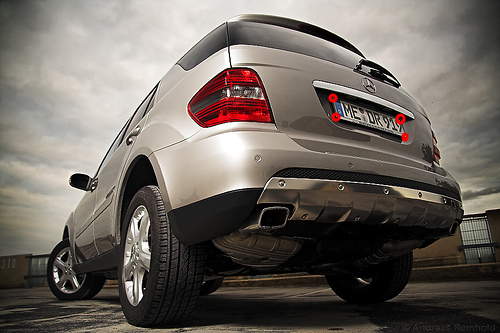

## perspective transform matrix를 직접 구하는 함수

In [ ]:
import numpy as np

# https://stackoverflow.com/a/14178717/744230 를 참고합니다
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float64)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
#     res = numpy.dot(numpy.linalg.inv(A), B)
    return np.array(res).reshape(8)

In [ ]:
! find opencv -type f -name "*.*" | xargs grep "getPerspectiveTransform"
# ! find opencv -type f -name "*.*" | xargs grep " solve("

## 직접 구한 matrix를 이용하는 방법과 opencv 함수를 이용하는 방법
- 두가지 경우의 결과가 동일한지 확인합니다
- 번호판이 정면으로 보이는것 같나요?
- 그 외 다른 부분은 어떤가요? 왜 그럴까요?
- 우리가 지금 적용한 perspective transform은 번호판이 있는 평면을 우리 시선에 보이는 정면의 평면으로 변환하는 transform matrix를 적용한 것입니다
- 실제 세계 입장에서 볼 때 자동차의 문이나 바퀴, 차량 하부가 있는 평면에 대한 matrix가 아닌 것입니다
- 이미 이 이미지는 실제 세계가 아닙니다. 실제 세계의 3D 형상이 2D 평면에 투영된 것입니다.
- 그 투영된 2D 이미지를 번호판의 입장에서 정면으로 변환하는 transform을 적용한 것이므로 실제 세계에서 번호판과 동일 평면상에 있지 않던 부분들은 왜곡이 발생하는 것입니다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2010_001550.jpg')
height, width, channel = image.shape



pa = np.float32([[333, 97], [401, 119], [406, 135], [338, 115]])
pb = np.float32([[333, 97], [401, 97], [401, 121], [333, 121]])

# perspective transform matrix를 직접 구합니다
a1, a2, b1, a3, a4, b2, c1, c2 = find_coeffs(pa,pb)
matrix = np.float64([[a1, a2, b1],[a3, a4, b2], [c1, c2, 1]])

# opencv 함수를 이용해 perspective transform matrix를 구합니다
matrix = cv2.getPerspectiveTransform(pa, pb)

perspective_image = cv2.warpPerspective(image, matrix, (width, height))

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('car', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# VOC2012 셋에 동일한 항공기에 대한 2장의 사진이 있습니다
- 2008_006619.jpg
- 2008_006621.jpg
- 아래는 이미지 확인용 코드이니 바로 실행해봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')

if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('airplane', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print('2008_006619.jpg\n')

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006621.jpg')

if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('airplane', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print('2008_006621.jpg')

# 우리는 2008_006619.jpg 를 2008_006621.jpg 처럼 변환할 수 있을까요?
- 예를 들면 이런식으로요
- 아래 각각 사각형은 무슨기준으로 그린걸까요?

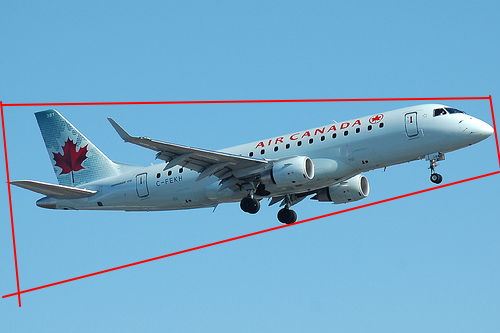

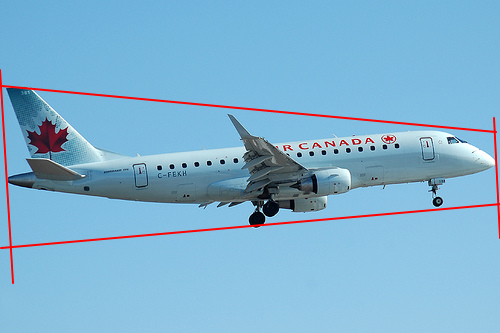

# 직접 해봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape

pa = np.float32([[0,105], [489, 98], [503, 171], [19, 293]])
pb = np.float32([[0,85], [496,132], [498,204], [10,247]])

# perspective transform matrix를 직접 구합니다
a1, a2, b1, a3, a4, b2, c1, c2 = find_coeffs(pa,pb)
matrix = np.float64([[a1, a2, b1],[a3, a4, b2], [c1, c2, 1]])

# opencv 함수를 이용해 perspective transform matrix를 구합니다
# matrix = cv2.getPerspectiveTransform(pa, pb)

perspective_image = cv2.warpPerspective(image, matrix, (width, height))

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('airplane', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 결과가 어떤가요?
- 4 points perspective transform 한번 수행으로는 불가능합니다
- 왜 그럴까요?
  - 마찬가지로 비행기의 동체, 주날개, 랜딩기어, 콕핏 등등이 실제 세계에서는 각기 다른 평면위에 존재했었기 때문입니다.
  -  이건 가능하겠죠?
    - AIR CANADA 글자(동체가 유선형이기 때문에 사실 이것도 엄밀히 따지면 불가합니다)
    - 단풍로고

# 단풍로고 한번 해볼까요?

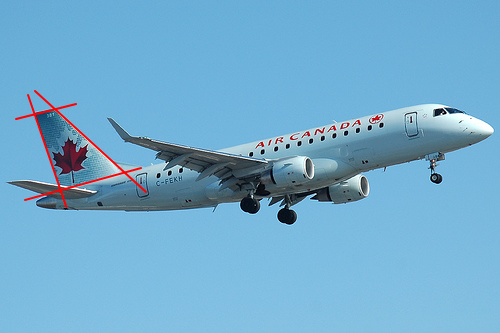

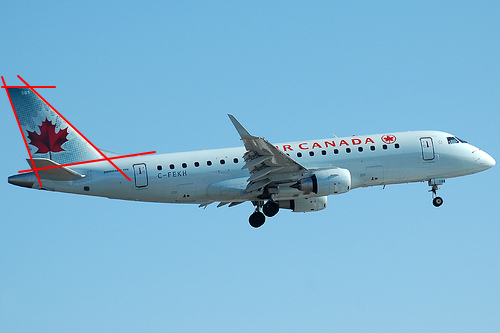

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape

pa = np.float32([[35,113], [54, 109], [124, 172], [60, 189]])
pb = np.float32([[6,87], [29,86], [107,158], [34,169]])

# perspective transform matrix를 직접 구합니다
a1, a2, b1, a3, a4, b2, c1, c2 = find_coeffs(pa,pb)
matrix = np.float64([[a1, a2, b1],[a3, a4, b2], [c1, c2, 1]])

# opencv 함수를 이용해 perspective transform matrix를 구합니다
# matrix = cv2.getPerspectiveTransform(pa, pb)

perspective_image = cv2.warpPerspective(image, matrix, (width, height))

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('airplane', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 아래 이미지랑 비교해봅시다
- 수직미익만 비교해봅시다
- 다른 부분(주날개, 엔진, 콕핏등등)은 전혀 안맞네요

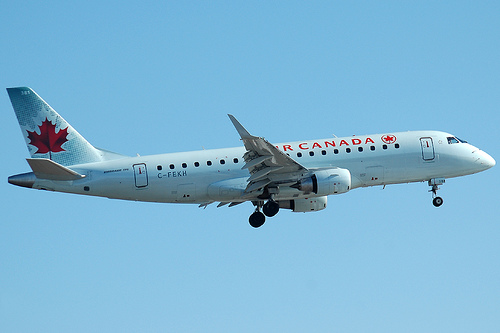

# 이번에는 버스를 정면에서 찍은 사진으로 바꿔봅시다
- 좀전의 결과와 비교하면 어떤가요?
- 버스의 측면과 후면을 비교해보면 어떤가요?
  - 측면이 정면에서 본 것처럼 되어있으면 후면은 안보여야 맞지 않을까요?
  - 그러나 여전히 후면이 보입니다

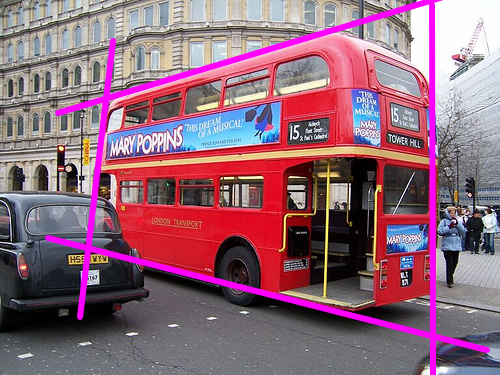

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_003141.jpg')
height, width, channel = image.shape

pa = np.float32([[104,97], [430, 3], [432, 336], [87, 247]])
pb = np.float32([[0,0], [430,0], [430,300], [0,300]])

# perspective transform matrix를 직접 구합니다
a1, a2, b1, a3, a4, b2, c1, c2 = find_coeffs(pa,pb)
matrix = np.float64([[a1, a2, b1],[a3, a4, b2], [c1, c2, 1]])

# opencv 함수를 이용해 perspective transform matrix를 구합니다
# matrix = cv2.getPerspectiveTransform(pa, pb)

perspective_image = cv2.warpPerspective(image, matrix, (width, height))

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('bus', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이번에는 기차로 해볼까요?
- 아래 구문을 채워봅시다
- 예상되는 결과를 먼저 생각해볼까요?

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_003083.jpg')
height, width, channel = image.shape


# 이부분을 완성해봅시다
matrix 
perspective_image = cv2.warpPerspective(image, matrix, (width, height))
# 여기까지

# 결과가 어떨까요?
if colab_env:
    cv2_imshow(perspective_image)

else:
    cv2.imshow('train', perspective_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()